<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/ProyectoDS_ParteIII_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quinto desafío | Data Science

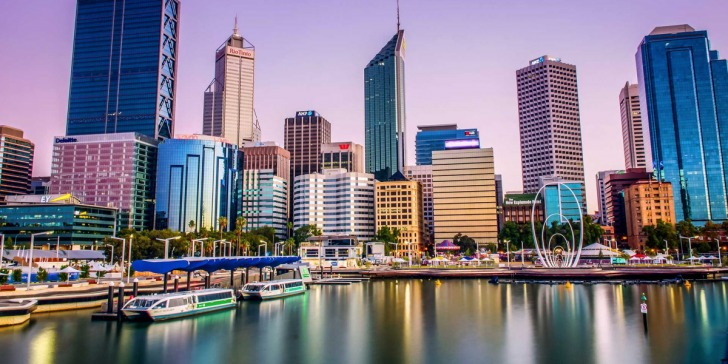

## 1 | Introducción

### Abstract

El conjunto de datos que se analiza en este estudio se centra analizar los precios de la vivienda en la ciudad de Perth utilizando técnicas de Data Science. El dataset contiene información detallada sobre:

*   `ADDRESS`: Dirección de la propiedad.
*   `SUBURB`: Suburbios donde pertenece la propiedad.
*   `PRICE`: Precio al que se vendio la propiedad.
*   `BEDROOMS`: Número de habitaciones.
*   `BATHROOMS`: Número de baños.
*   `GARAGE`: Número de garajes.
*   `LAND_AREA`: Superficie del terrerno. (m^2)
*   `FLOOR_AREA`: Superficie interna de la propiedad. (m^2)
*   `BUILD_YEAR`: Año que se construyo la propiedad.
*   `CBD_DIST`: Distancia desde el centro de Perth.
*   `NEAREST_STN`: Estación de transporte público más cercana.
*   `NEAREST_STN_DIST`: La distancia a la estación más cercana (m).
*   `DATE_SOLD`: Fecha que se vendió la propiedad.
*   `POSTCODE`: Codigo Postal
*   `LATITUDE`: Latitud
*   `LONGITUDE`: Longitud
*   `NEAREST_SCH`: Escuela más cercana.
*   `NEAREST_SCH_DIST`:Distancia a la escuela más cercana.
*   `NEAREST_SCH_RANK`: Clasificación de la escuela más cercana.


En este estudio se empleará estadística descriptiva y visualizaciones, como gráficos y mapas, para comprender los precios y características de las viviendas en Perth. También se utilizarán métodos de modelado predictivo para desarrollar un algoritmo que pronostique los precios basado en las características del conjunto de datos, identificando los factores clave que afectan el valor de las propiedades y cómo se relacionan entre sí.

### Motivación y audiencia

 La motivación detrás de este análisis radica en comprender los factores clave que influyen en los precios de la vivienda y proporcionar recomendaciones basadas en insights observados para compradores, vendedores y agentes inmobiliarios. Este estudio se dirige a estudiantes, profesionales del sector inmobiliario y cualquier persona interesada en comprender mejor el mercado de la vivienda en Perth.

### Herramientas y datos

**Librerias**

In [1]:
# Codigo para trabajar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset**

In [3]:
PATH = "/content/drive/MyDrive/Primera Entrega (Data Science)/Bases de datos/Perth Data.csv"
df = pd.read_csv(PATH)

In [4]:
df.sample(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
21390,4 Tilbury Mews,Quinns Rocks,625000,4,2,2.0,631,225,NaN,36300,Butler Station,2700,06-2018\r,6030,-31.658440,115.692750,IRENE MCCORMACK CATHOLIC COLLEGE,1.654334,120.0
33256,93 Amethyst Crescent,Mount Richon,482000,5,2,8.0,1630,187,1980.0,27700,Armadale Station,1100,11-2017\r,6112,-32.158401,116.023896,ARMADALE SENIOR HIGH SCHOOL,0.963544,NaN
3324,12 Aswan View,Joondalup,560000,4,3,2.0,243,159,2003.0,26600,Currambine Station,1200,01-2018\r,6027,-31.727860,115.762670,LAKE JOONDALUP BAPTIST COLLEGE,1.075991,80.0
29928,72 Sandown Circle,Henley Brook,455000,4,2,2.0,608,190,2003.0,20100,East Guildford Station,10600,01-2012\r,6055,-31.801280,115.975620,SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,1.207853,53.0
21169,4 Newark Place,Connolly,715000,4,2,2.0,708,182,1993.0,25800,Joondalup Station,2700,05-2018\r,6027,-31.744390,115.739230,PRENDIVILLE CATHOLIC COLLEGE,1.145756,60.0


In [5]:
#Pequeño ajuste de minusculas
df.columns = map(str.lower, df.columns)
df.columns

Index(['address', 'suburb', 'price', 'bedrooms', 'bathrooms', 'garage',
       'land_area', 'floor_area', 'build_year', 'cbd_dist', 'nearest_stn',
       'nearest_stn_dist', 'date_sold', 'postcode', 'latitude', 'longitude',
       'nearest_sch', 'nearest_sch_dist', 'nearest_sch_rank'],
      dtype='object')

## 2 | Hipotesis

Dentro del contexto de estudio, se plantean las siguientes hipotesis:

1.   ¿Cuáles son los factores más influyentes en la determinación de los precios de la vivienda en Perth?
2.   ¿Existe una correlación entre la ubicación de la vivienda y su precio?
1.   ¿Cómo afectan las características de la vivienda, como el tamaño y la cantidad de habitaciones, a su valor?
2.   ¿Hay patrones estacionales en los precios de la vivienda en Perth?


## 3 | Marco Teorico

### Objetivo

El objetivo de este proyecto es analizar y comprender los patrones y determinantes de los precios de la vivienda en Perth, utilizando algoritmos de machine learning y análisis exploratorio.

Se usaran algoritmos de machine learning como: Regresión Logistica, Arboles de desición, Random Forest, etc.

### Contexto Comercial

El mercado de la vivienda en Perth es un sector clave de la economía local. Comprender los factores que afectan los precios de la vivienda puede ayudar a los compradores a tomar decisiones informadas y a los vendedores a establecer precios competitivos. Los agentes inmobiliarios también pueden beneficiarse al ajustar sus estrategias en función de las tendencias observadas.


### Problema Comercial

El problema comercial que abordaremos es la falta de transparencia en los factores que influyen en los precios de la vivienda en Perth. Esto dificulta a los compradores y vendedores tomar decisiones fundamentadas y puede llevar a precios poco realistas en el mercado.

### Contexto analítico

Utilizaremos técnicas de Data Science, análisis exploratorio de datos y visualización para explorar y analizar conjuntos de datos de precios de viviendas en Perth. Esto nos permitirá identificar patrones y tendencias que arrojan luz sobre los factores influyentes en los precios de la vivienda.

## 4 | Análisis Exploratorio de Datos (EDA)


### Análisis Descriptivo

**Estructura del dataset**

In [6]:
df.shape

(33656, 19)

*Interpretación:*

*   Se encuentran 19 variables y 33 656 observaciones en este dataset.



**Información del dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           33656 non-null  object 
 1   suburb            33656 non-null  object 
 2   price             33656 non-null  int64  
 3   bedrooms          33656 non-null  int64  
 4   bathrooms         33656 non-null  int64  
 5   garage            31178 non-null  float64
 6   land_area         33656 non-null  int64  
 7   floor_area        33656 non-null  int64  
 8   build_year        30501 non-null  float64
 9   cbd_dist          33656 non-null  int64  
 10  nearest_stn       33656 non-null  object 
 11  nearest_stn_dist  33656 non-null  int64  
 12  date_sold         33656 non-null  object 
 13  postcode          33656 non-null  int64  
 14  latitude          33656 non-null  float64
 15  longitude         33656 non-null  float64
 16  nearest_sch       33656 non-null  object

In [8]:
#Tipos de variables
print("Número por tipo de columna:")
print(str(df.dtypes.value_counts()))
print("Cantidad de variables: "+ str(len(df.columns)))

Número por tipo de columna:
int64      8
float64    6
object     5
dtype: int64
Cantidad de variables: 19


*Interpretación:*

*   Tenemos 14 variables númericas y 5 categoricas en nuestro dataset. De igual forma esto se debe revisar de forma minuciosa para saber si este dato es del todo cierto.
*   Hay algunas variables que no tiene todas sus observaciones, lo cuál se debe revisar para saber si se debe imputar o eliminar la variable.


**Variables con observaciones nulas**

In [9]:
# Valores nulos EN NÚMERO
df.isnull().sum().sort_values(ascending=False)

nearest_sch_rank    10952
build_year           3155
garage               2478
nearest_stn_dist        0
nearest_sch_dist        0
nearest_sch             0
longitude               0
latitude                0
postcode                0
date_sold               0
address                 0
nearest_stn             0
suburb                  0
floor_area              0
land_area               0
bathrooms               0
bedrooms                0
price                   0
cbd_dist                0
dtype: int64

In [10]:
# Valores nulos EN PORCENTAJE
porcentaje_nulos = df.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos.round(2)  # Redondear a 2 cifras decimales
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)

print(porcentaje_nulos)

nearest_sch_rank    32.54
build_year           9.37
garage               7.36
nearest_stn_dist     0.00
nearest_sch_dist     0.00
nearest_sch          0.00
longitude            0.00
latitude             0.00
postcode             0.00
date_sold            0.00
address              0.00
nearest_stn          0.00
suburb               0.00
floor_area           0.00
land_area            0.00
bathrooms            0.00
bedrooms             0.00
price                0.00
cbd_dist             0.00
dtype: float64


*Interpretación:*

*   Podemos observar que solo 3 variables tienen observaciones con datos nulos, la cuál no superan el 50% de la información.
*   Se podría proceder a imputar estos datos para mejorar la calidad del dataset.


**Estadisticos**

In [11]:
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]

    # Redondeamos los valores flotantes a 2 decimales, excluyendo "count"
    for col in estadisticos.columns:
        if col != "count" and estadisticos[col].dtype == 'float64':
            estadisticos[col] = estadisticos[col].apply(lambda x: "{:,.2f}".format(x))

    # Formateamos "count" para eliminar decimales
    estadisticos["count"] = estadisticos["count"].apply(lambda x: "{:,.0f}".format(x))

    # Lo devolvemos
    return estadisticos

In [12]:
# Llamada a la función con el DataFrame df
resultados = estadisticos_cont(df.select_dtypes('number'))
resultados

,count,mean,median,std,min,25%,50%,75%,max
price,"33,656","637,072.01","535,500.00","355,825.63","51,000.00","410,000.00","535,500.00","760,000.00","2,440,000.00"
bedrooms,"33,656",3.66,4.00,0.75,1.00,3.00,4.00,4.00,10.00
bathrooms,"33,656",1.82,2.00,0.59,1.00,1.00,2.00,2.00,16.00
garage,"31,178",2.20,2.00,1.37,1.00,2.00,2.00,2.00,99.00
land_area,"33,656","2,740.64",682.00,"16,693.51",61.00,503.00,682.00,838.00,"999,999.00"
floor_area,"33,656",183.50,172.00,72.10,1.00,130.00,172.00,222.25,870.00
build_year,"30,501","1,989.71","1,995.00",20.96,"1,868.00","1,978.00","1,995.00","2,005.00","2,017.00"
cbd_dist,"33,656","19,777.37","17,500.00","11,364.42",681.00,"11,200.00","17,500.00","26,600.00","59,800.00"
nearest_stn_dist,"33,656","4,523.37","3,200.00","4,495.06",46.00,"1,800.00","3,200.00","5,300.00","35,500.00"
postcode,"33,656","6,089.42","6,069.00",62.17,"6,003.00","6,050.00","6,069.00","6,150.00","6,558.00"


*Interpretación:*

*   Aplicando estadistica descriptiva a nuestras 14 variables númericas, podemos observar de forma resumida como se encuentra distribuido nuestro dataset.
*   Podemos comparar la media y mediana, como también observar datos atípicos, para complementar este análisis se usaran gráficos univariados y bivariados.

### Gráficos

#### Gráficos Univariados

**Variables númericas**

In [13]:
# Variables númericas
df_num = df.iloc[:, 0:15].select_dtypes(include='number')
df_num1 = ["price","land_area", "floor_area","build_year", "cbd_dist", "nearest_stn_dist"]
df_num2 = df.loc[:, df_num1]

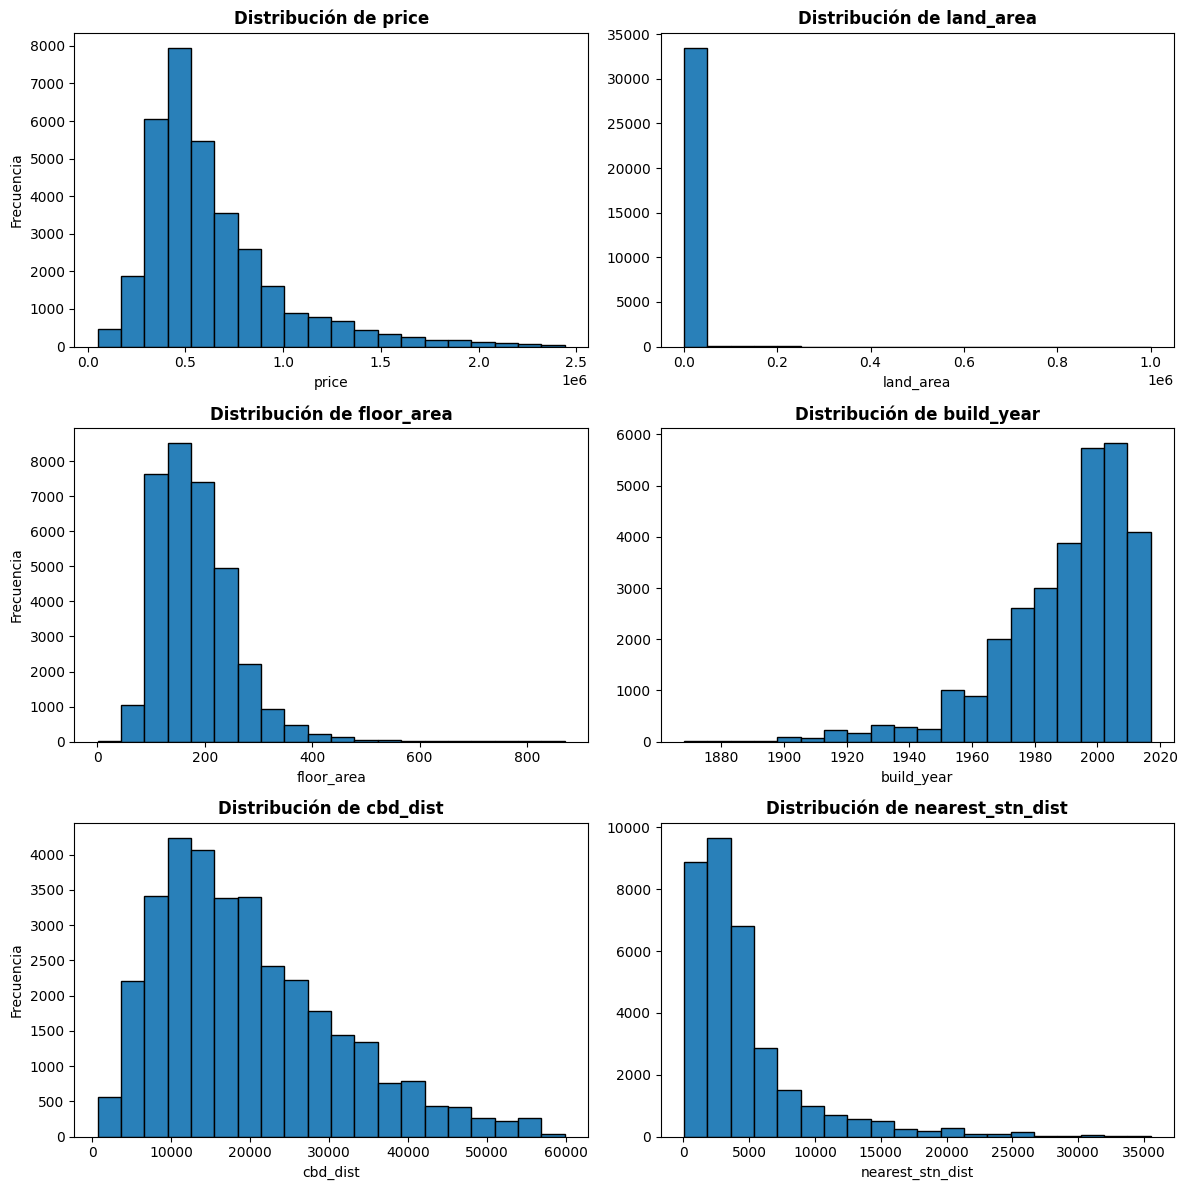

In [14]:
num_vars = len(df_num2.columns)
num_rows = math.ceil(num_vars / 2)

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

for i, column in enumerate(df_num2.columns):
    row = i // 2
    col = i % 2

    axs[row, col].hist(df_num[column], bins=20, edgecolor="black", color="#2980b9")
    axs[row, col].set_title(f"Distribución de {column}", fontsize = 12, fontweight = "bold")
    axs[row, col].set_xlabel(column)
    if col == 0:  # Solo mostrar "Frecuencia" en la primera columna
        axs[row, col].set_ylabel("Frecuencia")
    else:
        axs[row, col].set_ylabel("")  # Dejar vacío para las demás columnas

# Eliminar cuadros vacíos
if num_vars % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()

*Interpretación:*

*En este gráfico podemos observar como se distribuyen nuestras variables númericas más interesantes, dandonos ciertos indicios de como se relacionan entre ellas.*

**Por ejemplo,** tanto el precio (price), la superficie interna de la propiedad (floor_area) , la distancia desde el centro de Perth (cbd_dist) y la estación de transporte público más cercana (nearest_stn).

Comparten asimetria positiva, esto nos quiere decir que es muy probable que:

*   La media de los precios sean bajos.
*   Sera común encontrar casas con superficie interna de la propiedad no tan exagerada.
*   La mayoría de casas no esten tan lejos del centro de Perth
*   La estación de transporte esta cerca.

Podemos apreciar que (buil_year), año que se construyo la propiedad.
Presente asimetria negativa, lo cuál nos indica que mientras han transcurrido los años se ha ido construyendo más casas en la ciudad.

**Variables categoricas**

In [15]:
df_cat = df.iloc[:, 0:15].select_dtypes(include='object')
df_cat1 = ["bedrooms","bathrooms","garage"]
df_cat2 = df.loc[:, df_cat1]

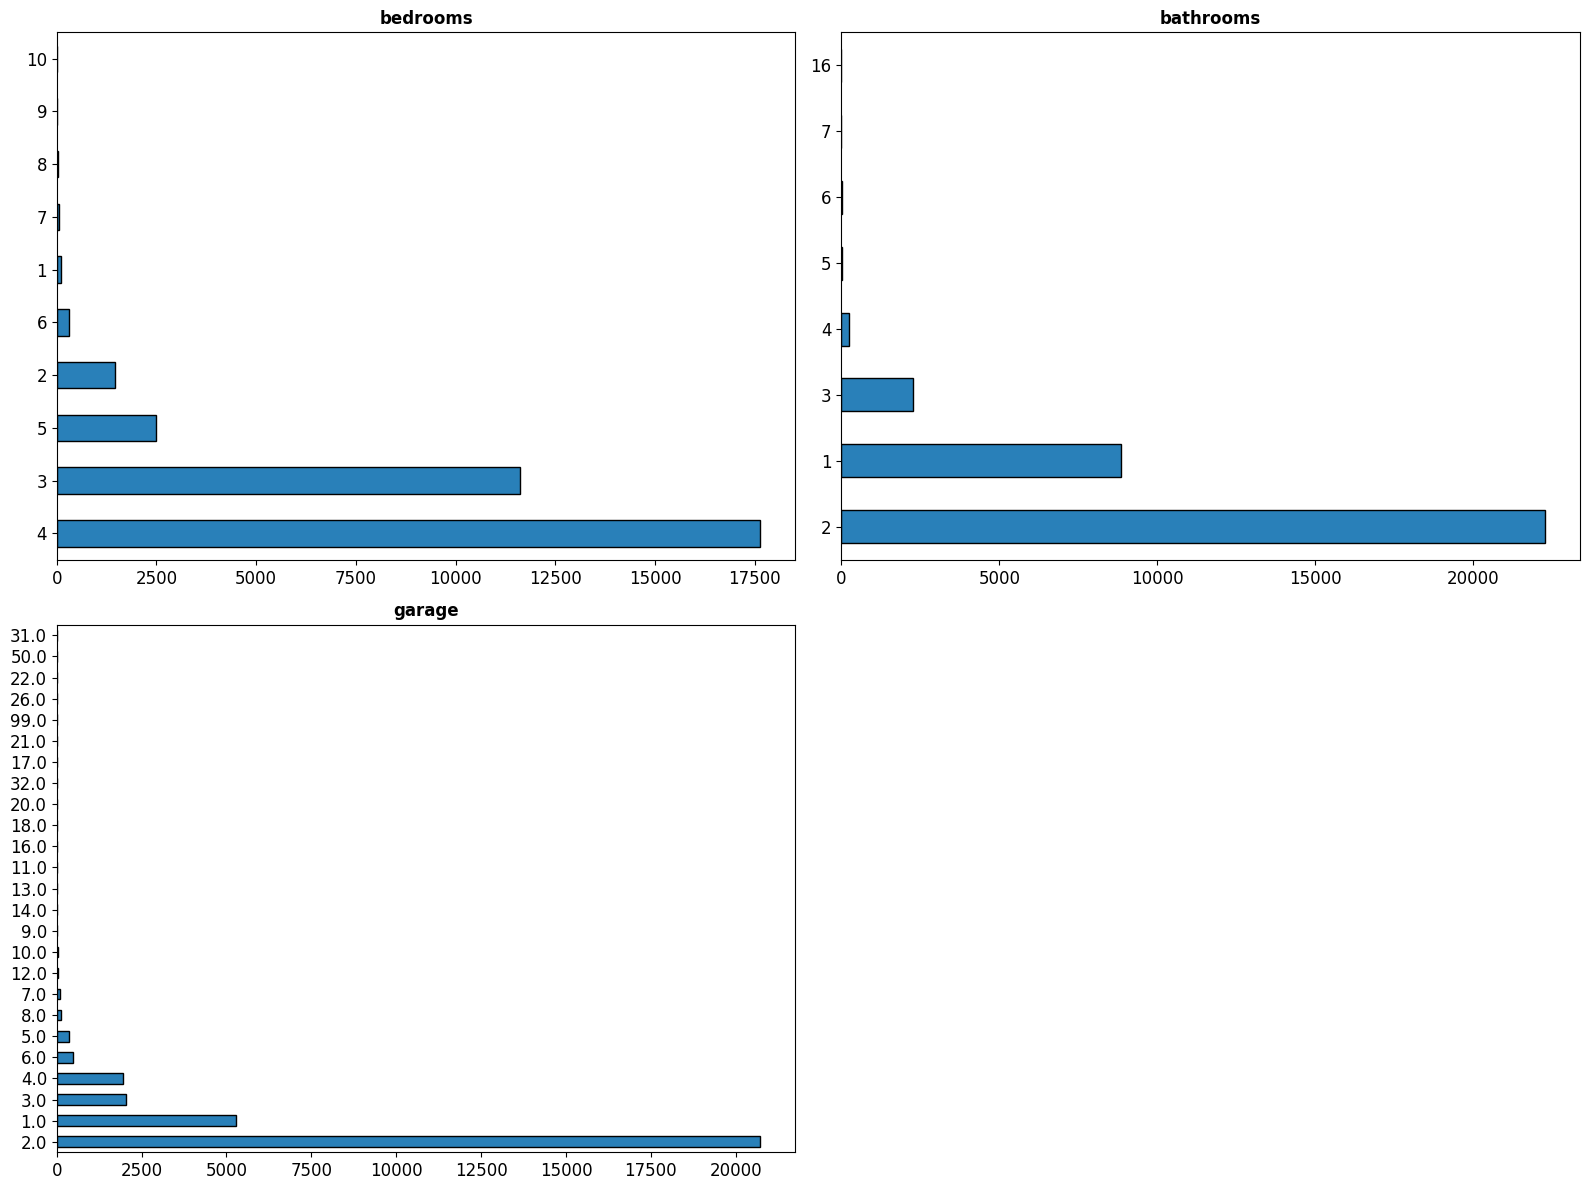

In [16]:
# Suponiendo que 'df_cat2' es tu DataFrame con las columnas categóricas
num_vars = len(df_cat2.columns)
num_rows = math.ceil(num_vars / 2)

# Creamos la figura y los ejes para los gráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

# Creamos el bucle que va añadiendo gráficos
for i, variable in enumerate(df_cat2.columns):
    row = i // 2
    col = i % 2

    # Graficamos el conteo de cada categoría en forma de barras horizontales
    df_cat2[variable].value_counts().plot.barh(ax=axs.reshape(-1)[i], color="#2980b9", edgecolor='black', linewidth=1)

    # Configuramos el título y tamaño de fuente
    axs.reshape(-1)[i].set_title(variable, fontsize=12, fontweight="bold")
    axs.reshape(-1)[i].tick_params(labelsize=12)

# Eliminar cuadros vacíos
if num_vars % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()
# Mostramos los gráficos
plt.show()

*Interpretación:*

*Como parte de este analisis, no podemos dejar de lado las variables categoricas que nos permitiran explicar más adelante el precio de una casa en Perth.*

*   Podemos visualizar que es común encontrar casas con 4 habitaciones, 2 baños y 2 garages. Pues, es lo que se encuentra en mayor medida en Perth.
*   A simple vista, parece que existen datos errones en la variable garage, pues se puede observar que una vivienda puede llegar a tener 17, 31, 50 o hasta incluso 99 garajes.

#### Gráficos Bivariados

**Gráfico de correlación**

<ipython-input-17-f6133c28e1a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


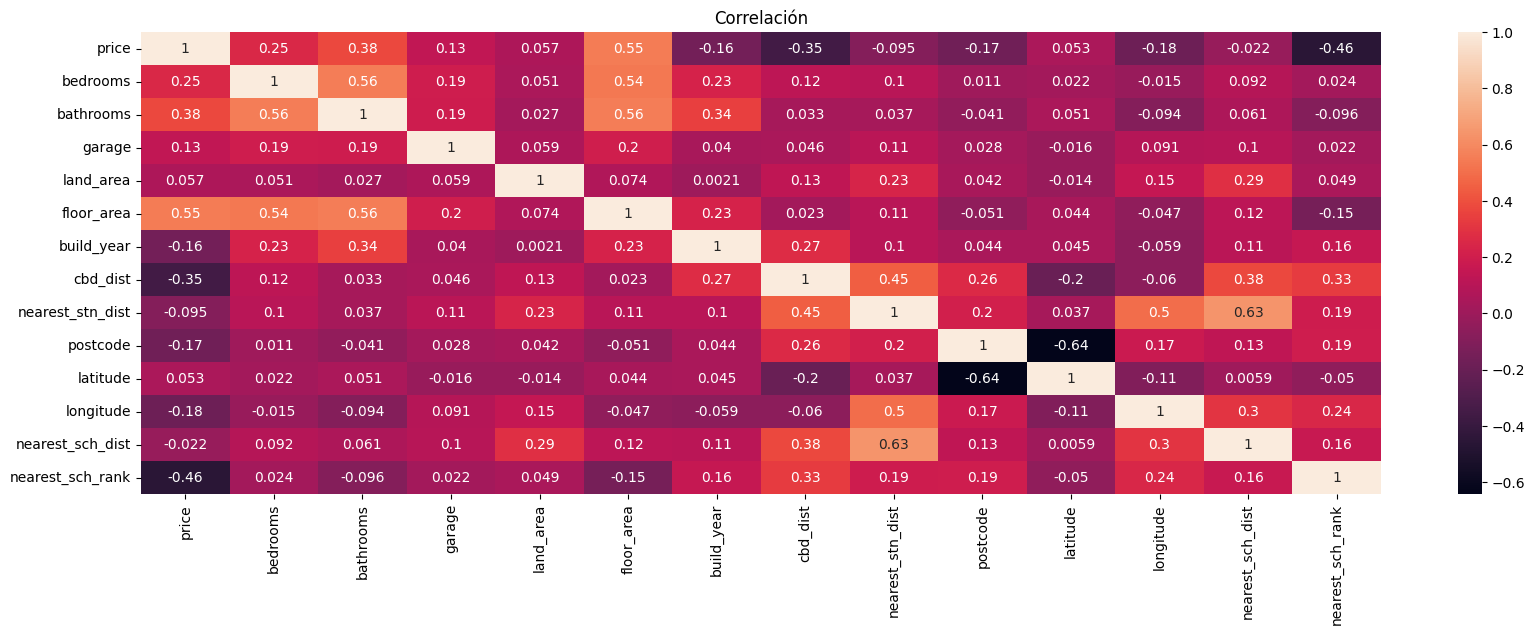

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlación")
plt.show()

*Interpretación:*

*En este heatmap podemos apreciar la correlación de la variables de estudio, debemos tener en cuenta que correlación no implica causalidad, esto quiere decir, que a pesar de presentar alta correlación positiva o negativa se debe averiguar si esto tiene sentido.*

**Como variables más interesantes tenemos**

*Correlación positiva*: Más cerca a 1

1.   floor_area (0.55)
2.   bathrooms (0.38)
1.   bedrooms (0.25)
2.   garage (0.13)

*Correlación negativa*: Más cercana a -1

1.   nearest_sch_rank (-0.46)
2.   cbd_dist (-0.35)


### Conclusión

A través de este pequeño EDA, podemos ver que la calidad de nuestros datos no es la óptima, por lo tanto se procederá a corregir el dataset para obtener más adelante obtener los INSIGHTS.

## 5 | Manipulación del dataset

*En este dataset, tenemos los siguientes inconvenientes:*

*   Tenemos 3 variables que contienen observaciones nulas.
*   Tenemos variables que ha simple vista contienen demasiados outliers.
*   Tenemos datos que son obsoletos para el análisis con algoritmos de machine learning.



### Arreglar nulos

**Observaciones nulas**

*   nearest_sch_rank (variable que será eliminada)
*   build_year (imputar con la mediana)
*   garage (completar con ceros)


**1 | garage**

In [18]:
# Completamos los nulos con 0
df['garage'] = df['garage'].fillna(0)
df['garage'] = df['garage'].astype(int)

**2 | build_year**

In [19]:
# Imputar con la mediana
df['build_year'] = df['build_year'].fillna(df['build_year'].median())
df['build_year'] = df['build_year'].astype(int)

*Interpretación:*

*   Asumimos que hay viviendas sin garajes.
*   La variable `garage` debe estar int, no en float.
*   Imputamos con la mediana, para mantener la coherencia y evitar distorción de los datos.
*   La variable `build_year` debe estar int, no en float.

### Arreglar outliers

**Variables con outliers**

*   garage
*   bedrooms
*   bathrooms
*   floor_area


**1 | garage**

In [20]:
# Reemplaza los valores mayores a 9 con la mediana
garage_threshold= 9
median_value= (df['garage'].median())
df.loc[df['garage'] > garage_threshold, 'garage'] = median_value

**2 | bedrooms**

In [21]:
# Reemplaza los valores mayores a 8 con la mediana
bed_threshold= 8
bed_median_value=  (df['bedrooms'].median())
df.loc[df['bedrooms'] > bed_threshold, 'bedrooms'] = bed_median_value

df['bedrooms'] = df['bedrooms'].astype(int)

**3 | bathrooms**

In [22]:
# Reemplaza los valores mayores a 5 con la mediana
bath_threshold= 5
bath_median_value=  (df['bathrooms'].median())
df.loc[df['bathrooms'] > bath_threshold, 'bathrooms'] = bath_median_value

df['bathrooms'] = df['bathrooms'].astype(int)

**4 | floor_area**

In [23]:
#Reemplazar los valores inferiores a 51 en la columna "floor_area" con el valor del percentil 25.
floor_area_threshold= 51
floor_area_percentile_value=  (df['floor_area'].quantile(0.25))

df.loc[df['floor_area'] < floor_area_threshold, 'floor_area'] = floor_area_percentile_value

*Interpretación:*

*   Los outliers de estas variables no permitiran que obtengamos una estimación realista en los modelos de machine learning por lo cuál se corrigen usando la mediana.
*   Se corrige el tipo de variable que debe estar en int, no en float

### Modificar variable

**Modificar variable de tiempo**
*   date_sold

**1 | date_sold**

In [24]:
# Pasar "date_sold" a datetime
df['date_sold'] = pd.to_datetime(df['date_sold'], format='%m-%Y\r')

# Dividir "date_sold" a "month" y "year" columna
df['month_sold'] = df['date_sold'].dt.month
df['year_sold'] = df['date_sold'].dt.year

*Interpretación:*

*   Para poder manipular de mejor forma la fecha de venta (`date_sold`), se decidio separar por mes y año.

### Eliminar variables

**Variables que no serán usadas en el modelo de machine learning**

*   address
*   cbd_dist
*   nearest_stn_dist
*   postcode
*   date_sold
*   latitude
*   longitude
*   nearest_sch_rank

In [25]:
df_clean = df.drop(['address','cbd_dist','nearest_stn_dist','postcode','date_sold','latitude','longitude','nearest_sch_rank'], axis=1)
df_clean.head(3)

,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,nearest_stn,nearest_sch,nearest_sch_dist,month_sold,year_sold
0,South Lake,565000,4,2,2,600,160,2003,Cockburn Central Station,LAKELAND SENIOR HIGH SCHOOL,0.828339,9,2018
1,Wandi,365000,3,2,2,351,139,2013,Kwinana Station,ATWELL COLLEGE,5.524324,2,2019
2,Camillo,287000,3,1,1,719,86,1979,Challis Station,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,6,2015


## 6 | Insights

**¿A que se debe los precios altos de las casas en Perth?**

Posibles respuestas:

*   Crecimiento económico
*   Desarrollo urbano limitado
*   Propiedades de la casa
*   Factores demográficos

Intentare explicar el precio de las casas de Perth estudiando sus propiedades, para esto primero estudiare las 3 variables categoricas gráficadas anteriormente.

### Insight A

####  Determinantes de precios por número

**1 | Relación entre el número de habitaciones y el precio de la casa**

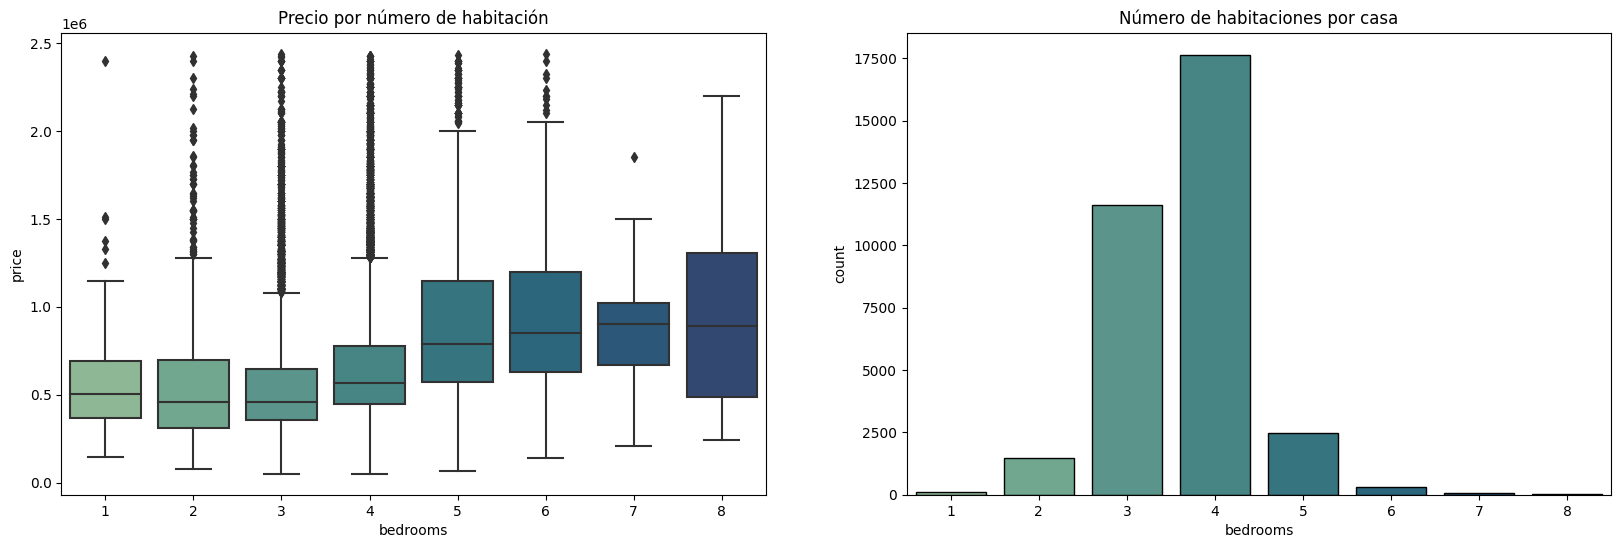

In [26]:
# INSIGHT_1
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Graf 1: Boxplot
sns.boxplot(x='bedrooms', y='price', data=df, ax=g1, palette="crest")
g1.set_title("Precio por número de habitación")

# Graf 2: Countplot
sns.countplot(x='bedrooms', data=df, ax=g2, palette="crest", edgecolor="black")
g2.set_title("Número de habitaciones por casa")

plt.show()

*Interpretación:*

*   Entre las viviendas de 1, 2, 3 y 4 habitaciones los precios no difieren mucho.
*   Se presentan casos atipicos, donde se pueden encontrar casas demasiadas caras a pesar de no contar con tantas habitaciones.
*   Es común encontrar más viviendas con 3 y 4 habitacciones.
*   No es tan común encontrar viviendas de más de 6 habitaciones.
*   Se puede observar que la media de precios va a aumentando cuando aumentan el número de habitaciones de 3 a 8.

**2 | Relación entre el número de baños y el precio de la casa**

Text(0.5, 1.0, 'Número de baños por casa')

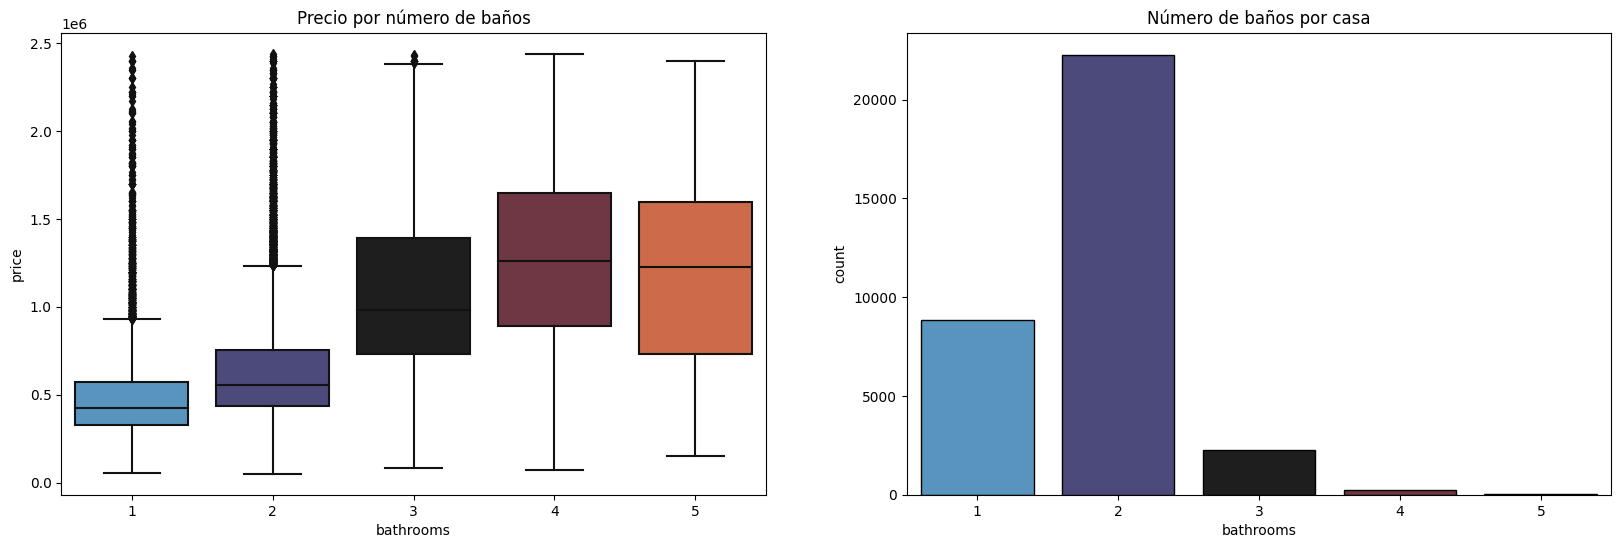

In [27]:
# INSIGHT_2
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico de caja (boxplot) utilizando Seaborn
sns.boxplot(x='bathrooms', y='price', data=df, ax=g1, palette="icefire")
g1.set_title("Precio por número de baños")

# Gráfico de conteo (countplot) utilizando Seaborn
sns.countplot(x='bathrooms', data=df, ax=g2, palette="icefire", edgecolor="black")
g2.set_title("Número de baños por casa")

*Interpretación:*

*   Se puede observar que mientras más baños tenga la vivienda mayor será la media de sus precios.
*   No es tan fácil encontrar viviendas con más de 4 baños, y la media de sus precios se podría considerar un poco alta.
*   Existen algunas casas con menos de 4 baños que suelen tener precios más altos que el resto.

**3 | Relación entre el número de garajes y el precio de la casa**

Text(0.5, 1.0, 'Número de garajes por casa')

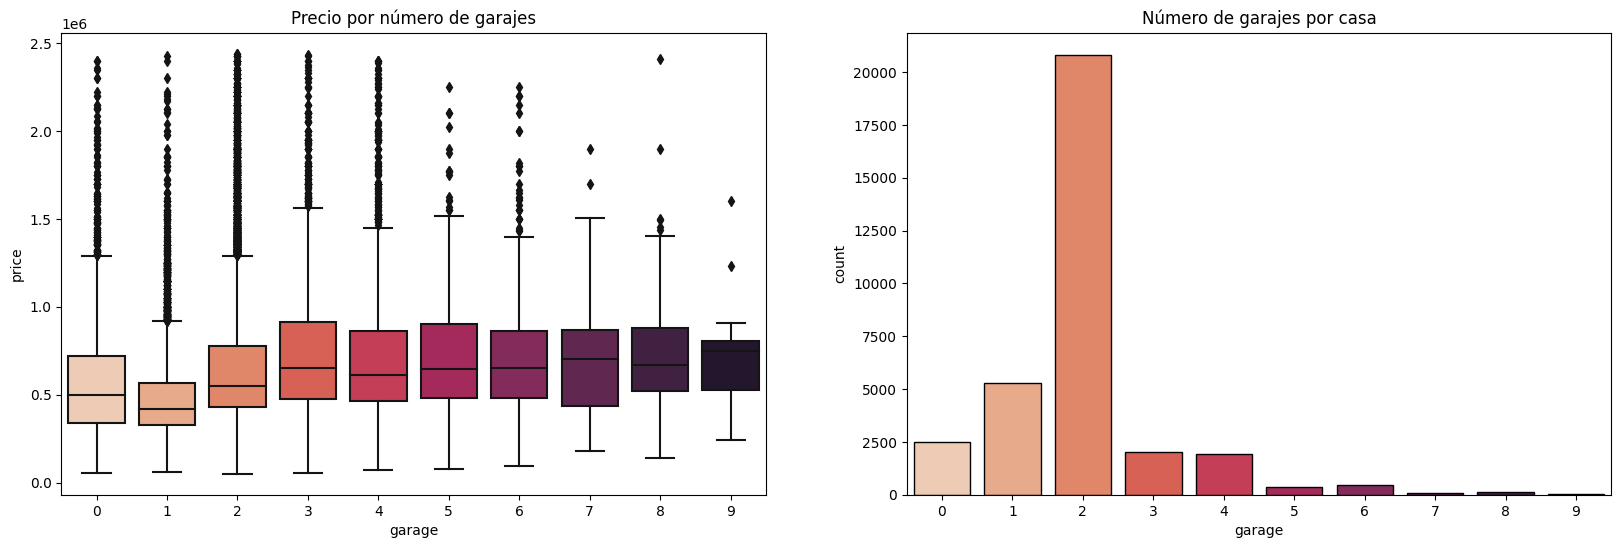

In [28]:
#  INSIGHT_3
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico de caja (boxplot) utilizando Seaborn
sns.boxplot(x='garage', y='price', data=df, ax=g1, palette="rocket_r")
g1.set_title("Precio por número de garajes")

# Gráfico de conteo (countplot) utilizando Seaborn
sns.countplot(x='garage', data=df, ax=g2, palette="rocket_r", edgecolor="black")
g2.set_title("Número de garajes por casa")

*Interpretación:*

*   La media de precios es muy parecida entre las viviendas, sin contar el número de garajes.
*   Existen casas con costos muy elevados sin la necesidad de tener muchos garajes.
*   Las viviendas con 2 garajes son las más comunes en Perth.


#### Conclusión

De los 3 puntos anteriores, se puede destacar lo siguiente:

*   Las viviendas con 4 habitaciones son las más comunes y la media de sus precios no es tan alta.
*   Las viviendas con 2 baños son las más comunes y la media de sus precios es baja.
*   Las viviendas con 2 garajes son las más solicitadas y la media de sus precios es baja, y no difiere mucho de viviendas con más garajes.

Estos INSIGHT nos han permitido saber que tipos de viviendas han sido más demandadas en Perth. Pero, no nos deja muy claro que determina el mayor precio. Por cuál se sigue analizando en el siguiente apartado **Insight B**.


### Insight B:

#### Determinantes de precios por año de construcción

Text(0.5, 1.0, 'Casas construidas por años')

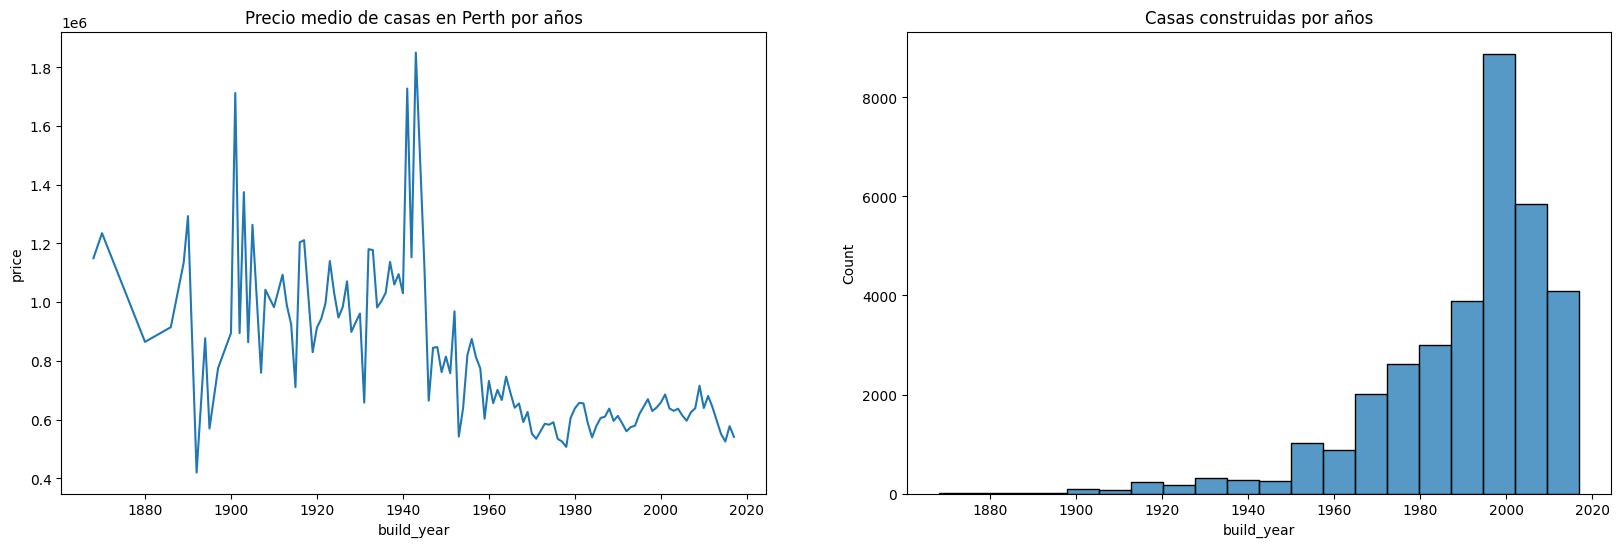

In [29]:
#INSIGHT_4
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico de caja (boxplot) utilizando Seaborn
sns.lineplot(x='build_year', y='price', data=df, ax=g1, errorbar=None)
g1.set_title("Precio medio de casas en Perth por años")

# Gráfico de conteo (countplot) utilizando Seaborn
sns.histplot(data=df, x='build_year', bins=20, ax=g2)
g2.set_title("Casas construidas por años")

*Interpretación*

*   Este gráfico lineal muestra la variación media de los precios de las casas a lo largo de los años. El pico más alto se dio en la decada de los años 40, esto debe ser analizado.
*   Cabe resaltar que este gráfico lineal solo me esta mostrando los precios medios por años, hay casas en los 2000 igual de caras de las que se presentan en dicho año.
*   Podemos observar del segundo gráfico, que durante se han transcurrido los años, se han ido construyendo más casas en Perth, y aunque en 1940 se construyeron pocas casas, estas tienen la media más cara del mercado inmobiliario.

#### Conclusión

Del punto anterior se puede destacar lo siguiente:

*   Las casas que se construyeron en la decada de 1940 tienen la media de precios más altos, lo cuál podría ser un indicador clave. Pues, este analisis lo podemos complementar averiguando en que zona fueron construidas estas viviendas.
*   Podriamos suponer que estas viviendas fueron construidas en una zona que ha día de hoy es exclusiva, o es una zona centrica con mucho turismo, esto se seguirá analizando en el siguiente apartado **Insight C**.

### Insight C:

#### Determinantes de precios por ubicación

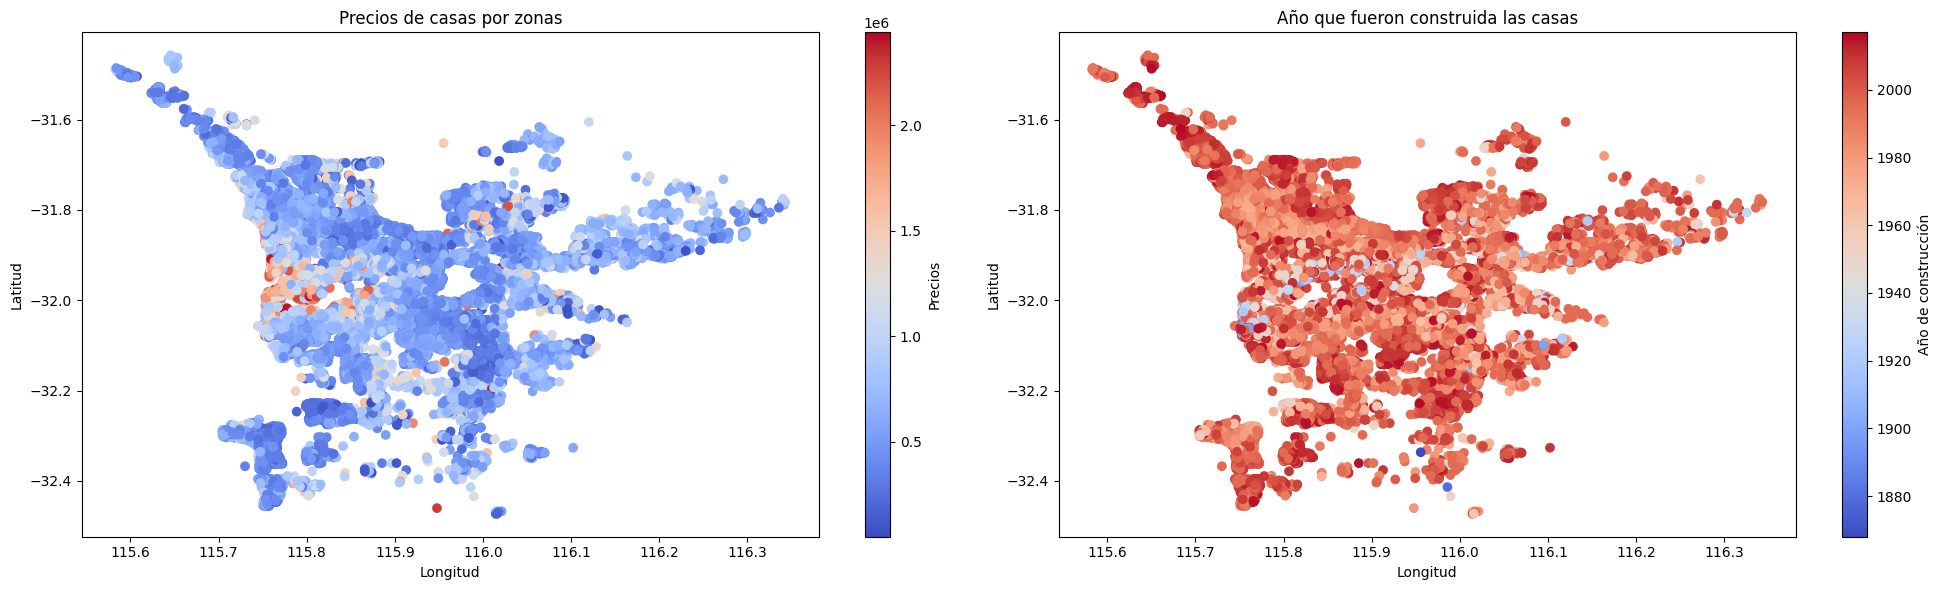

In [30]:
#INSIGHT_5

# Tamaño personalizado de la figura (ancho x altura en pulgadas)
ancho_figura = 20
altura_figura = 6

# Crear una figura y ejes para los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico 1: Precios de casas por zonas (con color según el precio)
x1 = df.longitude
y1 = df.latitude
scatter1 = ax1.scatter(x1, y1, c=df.price, cmap='coolwarm')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Precios de casas por zonas')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Precios')

# Gráfico 2: Precios de casas por zonas (con color según el año de construcción)
x2 = df.longitude
y2 = df.latitude
scatter2 = ax2.scatter(x2, y2, c=df.build_year, cmap='coolwarm')
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')
ax2.set_title('Año que fueron construida las casas')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Año de construcción')

# Ajustar el espaciado entre los dos gráficos
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

*Interpretación*

*   En el primer gráfico, podemos apreciar que los precios de las casas no suelen ser tal altos en Perth, pues estan de color azul, pero una zona especifica se encuentra de color rojo y es donde se presentan las casas más caras de Perth.

* En el segundo gráfico, podemos ver que las casas que fueron hechas en 1940, justo se encuentran en esa pequeña zona donde las casas son más caras, esto puede explicar el alto precio medio que tienen las casas construidas en 1940.

#### Conclusión

* En este INSIGHT pudimos descubrir que las viviendas más caras se encuentran en una zona especifica.

### Insight D:

#### Las 100 casas más caras

In [31]:
# INSIGHT_6
#Ordenar el DataFrame por la columna "price" en orden descendente
df_sorted = df.sort_values(by='price', ascending=False)

# Seleccionar las características de las casas más caras (los primeros registros después de ordenar)
df_caras = df_sorted.head(100)

In [32]:
# Estadísticos
resultados1 = estadisticos_cont(df_caras.select_dtypes('number'))
resultados1

,count,mean,median,std,min,25%,50%,75%,max
price,100,"2,336,982.50","2,327,500.00","56,255.15","2,250,000.00","2,300,000.00","2,327,500.00","2,400,000.00","2,440,000.00"
bedrooms,100,4.09,4.00,0.92,1.00,4.00,4.00,5.00,6.00
bathrooms,100,2.59,3.00,0.88,1.00,2.00,3.00,3.00,5.00
garage,100,2.42,2.00,1.19,0.00,2.00,2.00,3.00,8.00
land_area,100,"9,724.66",910.00,"49,489.51",270.00,667.75,910.00,"1,014.25","384,707.00"
floor_area,100,320.32,308.50,111.07,82.00,257.00,308.50,378.25,870.00
build_year,100,"1,978.28","1,989.50",27.88,"1,905.00","1,953.75","1,989.50","2,000.00","2,015.00"
cbd_dist,100,"10,468.00","9,300.00","6,892.45","1,400.00","7,100.00","9,300.00","10,825.00","57,200.00"
nearest_stn_dist,100,"2,898.49","2,650.00","2,516.34",213.00,"1,100.00","2,650.00","4,100.00","20,300.00"
postcode,100,"6,039.23","6,012.00",51.70,"6,005.00","6,009.00","6,012.00","6,035.00","6,159.00"


#### Las 100 casas más baratas

In [33]:
# INSIGHT_6
#Ordenar el DataFrame por la columna "price" en orden descendente
df_sorted2 = df.sort_values(by='price', ascending=True)

# Seleccionar las características de las casas más caras (los primeros registros después de ordenar)
df_baratas = df_sorted2.head(100)

In [34]:
# Estadísticos
resultados2 = estadisticos_cont(df_baratas.select_dtypes('number'))
resultados2

,count,mean,median,std,min,25%,50%,75%,max
price,100,"78,099.80","80,000.00","13,277.64","51,000.00","68,875.00","80,000.00","87,535.00","98,000.00"
bedrooms,100,3.63,4.00,0.76,2.00,3.00,4.00,4.00,5.00
bathrooms,100,1.59,2.00,0.60,1.00,1.00,2.00,2.00,4.00
garage,100,1.55,2.00,1.16,0.00,0.75,2.00,2.00,6.00
land_area,100,"8,967.26","2,221.00","14,486.20",217.00,816.25,"2,221.00","10,120.00","90,527.00"
floor_area,100,194.59,190.00,78.30,81.00,123.75,190.00,242.75,447.00
build_year,100,"1,988.14","1,995.00",19.61,"1,915.00","1,976.25","1,995.00","2,002.00","2,013.00"
cbd_dist,100,"27,273.00","27,100.00","9,768.09","9,400.00","18,725.00","27,100.00","32,925.00","53,100.00"
nearest_stn_dist,100,"9,745.53","10,450.00","7,171.45",852.00,"3,375.00","10,450.00","13,500.00","31,000.00"
postcode,100,"6,102.89","6,078.00",88.11,"6,018.00","6,065.75","6,078.00","6,125.00","6,558.00"


#### Comparación 100 casas más caras y baratas

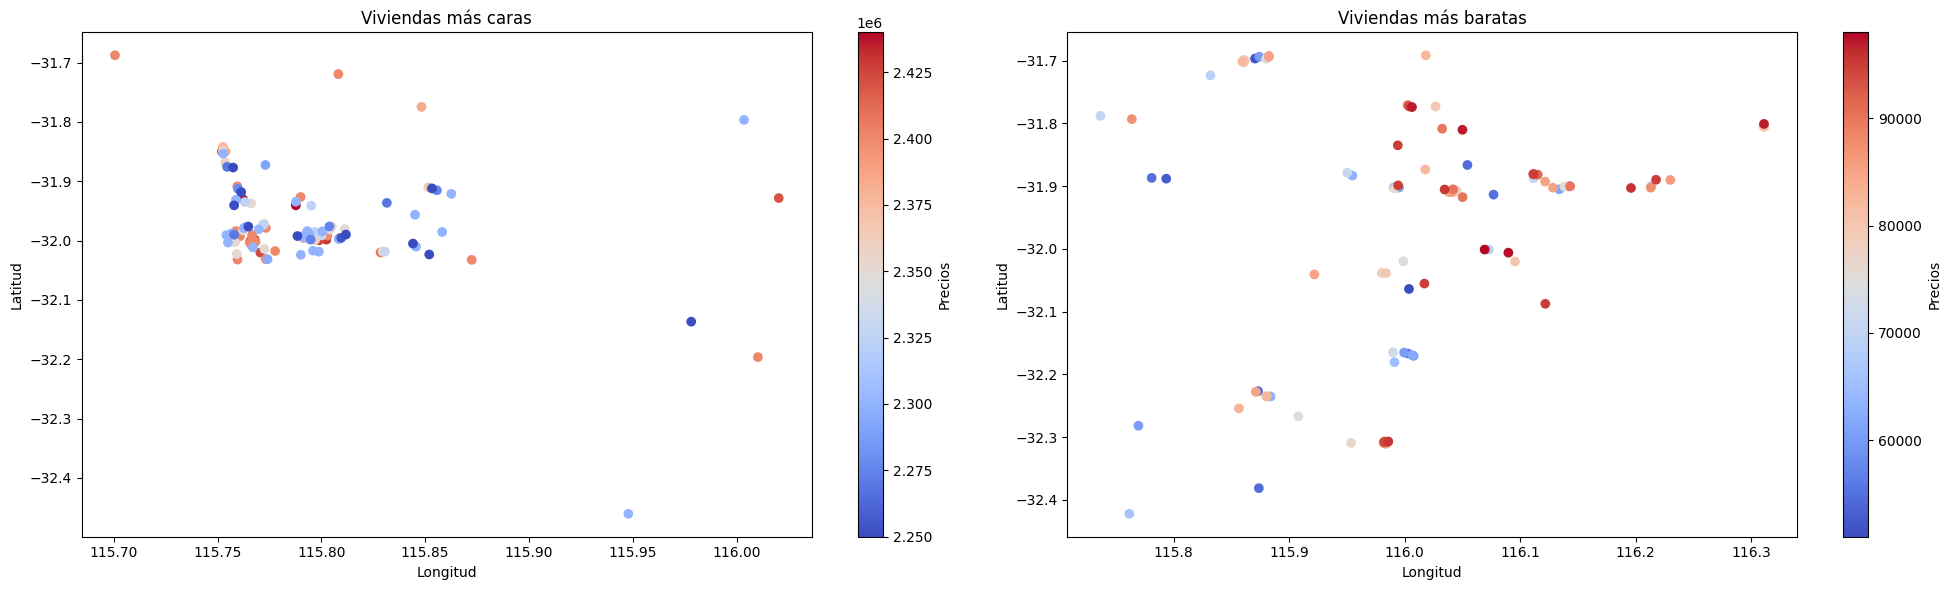

In [35]:
#INSIGHT_5

# Tamaño personalizado de la figura (ancho x altura en pulgadas)
ancho_figura = 20
altura_figura = 6

# Crear una figura y ejes para los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico 1: Precios de casas por zonas (con color según el precio)
x1 = df_caras.longitude
y1 = df_caras.latitude
scatter1 = ax1.scatter(x1, y1, c=df_caras.price, cmap='coolwarm')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Viviendas más caras')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Precios')

# Gráfico 2: Precios de casas por zonas (con color según el año de construcción)
x2 = df_baratas.longitude
y2 = df_baratas.latitude
scatter2 = ax2.scatter(x2, y2, c=df_baratas.price, cmap='coolwarm')
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')
ax2.set_title('Viviendas más baratas')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Precios')

# Ajustar el espaciado entre los dos gráficos
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

#### Conclusión

En este punto podemos destacar los siguiente:

*Las 100 viviendas más caras tienen las siguientes caracteristicas:*
*   Pueden llegar a costar  A$ 2,336,982.50	de dolares australianos.
*   Tienen 4 habitaciones, 3 baños y 2 garajes.
*   Se encuentran en estas coordenadas -31.99 latitud y 115.79 longitud.

*Las 100 viviendas más baratas tienen las siguientes caracteristicas:*
*   Pueden llegar a costar  A$ 78,099.80 de dolares australianos.
*   Tienen 4 habitaciones, 2 baños y 2 garajes.
*   Se encuentran en estas coordenadas --31.91 latitud y 115.99 longitud.

Al parecer lo que determina el precio de las viviendas de Perth es la zona en la que fue construida.

## 7 | Evaluando Modelos de ML

**Preprosesamiento de datos**

In [36]:
# One-hot encode SUBURB, NEAREST_STN and NEAREST_SCH columns
for column in ['suburb','nearest_stn','nearest_sch']:
    dummies= pd.get_dummies(df_clean[column], prefix= column)
    df_clean= pd.concat([df_clean, dummies], axis=1)
    df_clean= df_clean.drop(column, axis=1)

df_clean.head()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,nearest_sch_dist,month_sold,year_sold,...,nearest_sch_TRINITY COLLEGE,nearest_sch_URSULA FRAYNE CATHOLIC COLLEGE,nearest_sch_WANNEROO SECONDARY COLLEGE,nearest_sch_WARNBRO COMMUNITY HIGH SCHOOL,nearest_sch_WARWICK SENIOR HIGH SCHOOL,nearest_sch_WESLEY COLLEGE,nearest_sch_WILLETTON SENIOR HIGH SCHOOL,nearest_sch_WOODVALE SECONDARY COLLEGE,nearest_sch_YANCHEP SECONDARY COLLEGE,nearest_sch_YOUTH FUTURES COMMUNITY SCHOOL
0,565000,4,2,2,600,160,2003,0.828339,9,2018,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,2013,5.524324,2,2019,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,1979,1.649178,6,2015,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,1953,1.571401,7,2018,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,1998,1.514922,11,2016,...,0,0,0,0,0,0,0,0,0,0


**Librerias**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

**Variable objtivo: y**

In [38]:
# Separate the y variable, the labels
y = df_clean["price"]

# Separate the X variable, the features
X = df_clean.drop(columns="price")

**Diviendo el dataset en entrenamiento y testeo**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(25242, 558)

### Modelo de Regresión Lineal

In [40]:
# Instantiate the Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model using the training data
linear_regression_model.fit(X_train, y_train)

# Use the Test data to make a prediction
lr_predict = linear_regression_model.predict(X_test)
lr_predict

array([545507.4768157 , 470901.55230045, 758397.03560257, ...,
       414211.36534262, 289123.13789749, 922472.62483358])

In [41]:
 # Score the model
print(f"Training Data Score: {linear_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {linear_regression_model.score(X_test, y_test)}")

Training Data Score: 0.7900958035193935
Testing Data Score: 0.7558257360479086


In [42]:
# Compute the metrics for the linear regression model
lr_score = linear_regression_model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, lr_predict)
mse = mean_squared_error(y_test, lr_predict)
rmse = np.sqrt(mse)
std = np.std(y_test)

In [43]:
# Print releveant metrics.
print(f"The score is {lr_score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.7558257360479086.
The r2 is 0.7558257360479086.
The mean squared error is 31705639788.055157.
The root mean squared error is 178060.77554603416.
The standard deviation is 360344.8478743645.


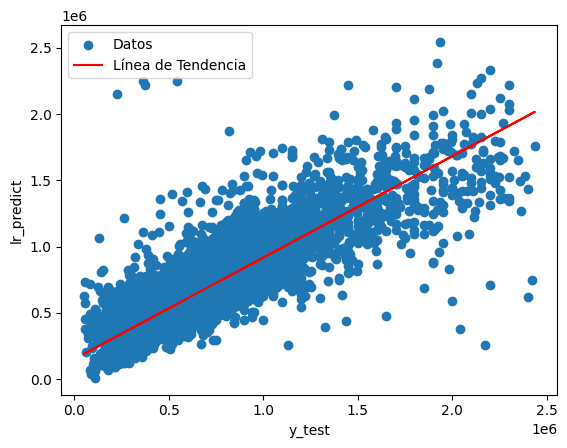

In [44]:
# Crear el scatter plot
plt.scatter(y_test, lr_predict, label='Datos')

# Calcular la línea de tendencia (ajuste lineal)
coefficients = np.polyfit(y_test, lr_predict, 1)
line = coefficients[0] * y_test + coefficients[1]

# Trazar la línea de tendencia
plt.plot(y_test, line, color='red', label='Línea de Tendencia')

# Etiquetas y leyendas
plt.xlabel('y_test')
plt.ylabel('lr_predict')
plt.legend()

# Mostrar el gráfico
plt.show()






### Modelo Arboles de decisiones

In [45]:
# Create Standard Scaler
scaler= StandardScaler()

# Fit Standard Scaler
X_scaler= scaler.fit(X_train)

# Scale Data
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)


In [46]:
# Create the Decision Tree Regressor
tree_model= tree.DecisionTreeRegressor(min_samples_split=200, random_state=10)

# Fit the model
tree_model.fit(X_train, y_train)

# Make Predictions using the Tree Model
tree_predict= tree_model.predict(X_test)
tree_predict

array([584687.5       , 390065.87301587, 696616.66666667, ...,
       462900.0974359 , 340895.34883721, 588828.48695652])

In [47]:
# Compute the metrics for the Decision Tree model
dt_score = tree_model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, tree_predict)
mse = mean_squared_error(y_test, tree_predict)
rmse = np.sqrt(mse)
std = np.std(y_test)

In [48]:
# Print releveant metrics.
print(f"The score is {dt_score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.6630244930558096.
The r2 is 0.6630244930558096.
The mean squared error is 43755733579.95686.
The root mean squared error is 209178.71206209503.
The standard deviation is 360344.8478743645.


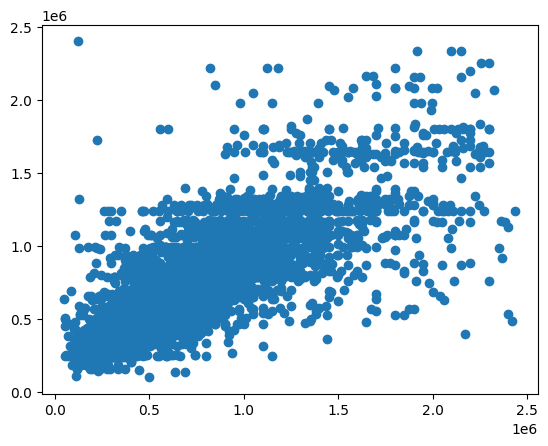

In [49]:
# Create a scatter plot
plt.scatter(y_test, tree_predict)